# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [3]:
#import os
#os.environ['KMP_DUPLICATE_LIB_OK']='True' #This is needed in my Anaconda+MacOsX installation; leave it commented.
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [4]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model
    
print('Model architecture created successfully!')

Model architecture created successfully!


In [6]:
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def compile_model(optim):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=optim(),
                  metrics=['acc'])
    return model

print('Model compiled successfully and ready to be trained.')

Model compiled successfully and ready to be trained.


#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

In [7]:
# you will need the following for Convolutional Neural Networks

from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


One can ask the question of whether a neural net can learn to recognize such local patterns. This can be achieved by using convolutional layers.

### Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **<span style="color:red">you should complete</span>**.



In [8]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import SGD

# Define the number of classes, here for a classification problem with 10 digits (0 to 9)
num_classes = 10

# Function to create and return the CNN model
def create_CNN():
    # Instantiate a sequential model, where each layer is added one after the other
    model = Sequential()
    
    # First convolutional layer:
    # Uses 10 filters with a kernel size of 5x5 to extract local features from the image
    # ReLU activation function
    # input_shape=(28,28,1) specifies the input image format (28x28 pixels, 1 color channel for grayscale)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
    
    # Pooling layer:
    # Uses a 5x5 kernel to reduce the spatial dimensionality of the data
    # This helps reduce the number of parameters and prevent overfitting
    model.add(MaxPooling2D(pool_size=(5, 5)))
    
    # Dropout layer:
    # Sets the dropout rate to 25%, randomly dropping 25% of neurons in this layer
    # Useful for reducing overfitting
    model.add(Dropout(0.25))
    
    # This layer learns more complex features, with a higher number of filters
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))  # Dropout at 25% to reduce overfitting in this layer

    # Flattening layer:
    # Flattens the data to make it one-dimensional, preparing it for fully connected layers
    model.add(Flatten())

    # First dense layer:
    # Contains 128 neurons and uses ReLU activation
    # This layer allows the network to combine features in a complex way
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout at 50% to prevent overfitting in dense layers

    # Output layer:
    # Uses softmax activation to produce a probability distribution across 10 classes
    # Necessary for multi-class classification (0 to 9), matching the value of num_classes
    model.add(Dense(num_classes, activation='softmax'))

    # Extension comment:
    # Here, you can add additional layers, such as more Dropout, 2D convolutional, or pooling layers
    # Before reaching the final softmax layer, the network should pass through a Flatten layer,
    # which prepares the data for classification across the 10 classes.
    
    # Compile the model:
    # Uses categorical_crossentropy loss function, suitable for multi-class classification
    # The optimizer is SGD (Stochastic Gradient Descent)
    # The metric used to track performance is accuracy ('acc')
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    
    # Return the created model
    return model


Train your CNN and evaluate its performance proceeding exactly as before:

In [11]:
batch_size = 32  # Number of samples per gradient update
epochs = 25  # Number of times the entire training data is used
# Create the CNN model
model_CNN = create_CNN()

# Train the CNN model and store the training history
history_cnn = model_CNN.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=epochs,
                            verbose=1,  # Show training progress
                            validation_data=(X_test, Y_test))  # Use test set for validation

# Evaluate the model performance on the test set
score = model_CNN.evaluate(X_test, Y_test, verbose=1)
# Print performance metrics
print()
print('Test loss:', score[0])  # Loss on the test data
print('Test accuracy:', score[1])  # Accuracy on the test data

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.2003 - loss: 2.1725 - val_acc: 0.8665 - val_loss: 0.6790
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.6936 - loss: 0.9220 - val_acc: 0.9307 - val_loss: 0.2639
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.8225 - loss: 0.5643 - val_acc: 0.9495 - val_loss: 0.1840
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8674 - loss: 0.4343 - val_acc: 0.9586 - val_loss: 0.1449
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8841 - loss: 0.3801 - val_acc: 0.9631 - val_loss: 0.1260
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - acc: 0.8987 - loss: 0.3413 - val_acc: 0.9658 - val_loss: 0.1148
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - acc: 0.9045 - loss: 0.3187 - val_acc: 0.9677 - val_loss: 0.1072
Epoch 8/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - acc: 0.9094 - loss: 0.3032 - val_acc: 0.9695 - val_loss: 0.1012
Epoch 9/25
1875/1875 ━━━━━━━━━━━━━━━━━━━

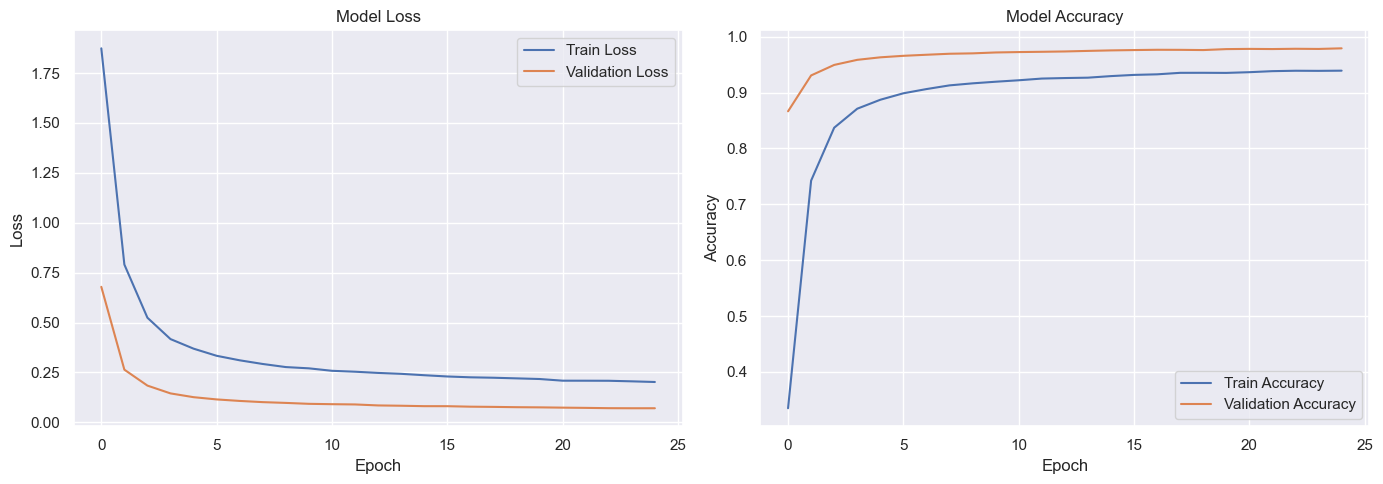

In [13]:
# Define training parameters
import seaborn as sns

sns.set_theme(style = 'darkgrid')

# Plotting loss and accuracy side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot for training and validation loss
ax1.plot(history_cnn.history['loss'], label='Train Loss')  # Training loss
ax1.plot(history_cnn.history['val_loss'], label='Validation Loss')  # Validation loss
ax1.set_title('Model Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend(loc='best')

# Plot for training and validation accuracy
ax2.plot(history_cnn.history['acc'], label='Train Accuracy')  # Training accuracy
ax2.plot(history_cnn.history['val_acc'], label='Validation Accuracy')  # Validation accuracy
ax2.set_title('Model Accuracy')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend(loc='best')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


What can be observed in this plot is that the training loss remains consistently higher than the validation loss. This could be due to the presence of dropout layers within the CNN, which help prevent overfitting during training. As a result, the validation loss and validation accuracy improve, although this comes at the cost of slightly lower training performance

In the end, **<span style="color:red">add the evaluation of your CNN performances</span>** like that used for the DNN.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


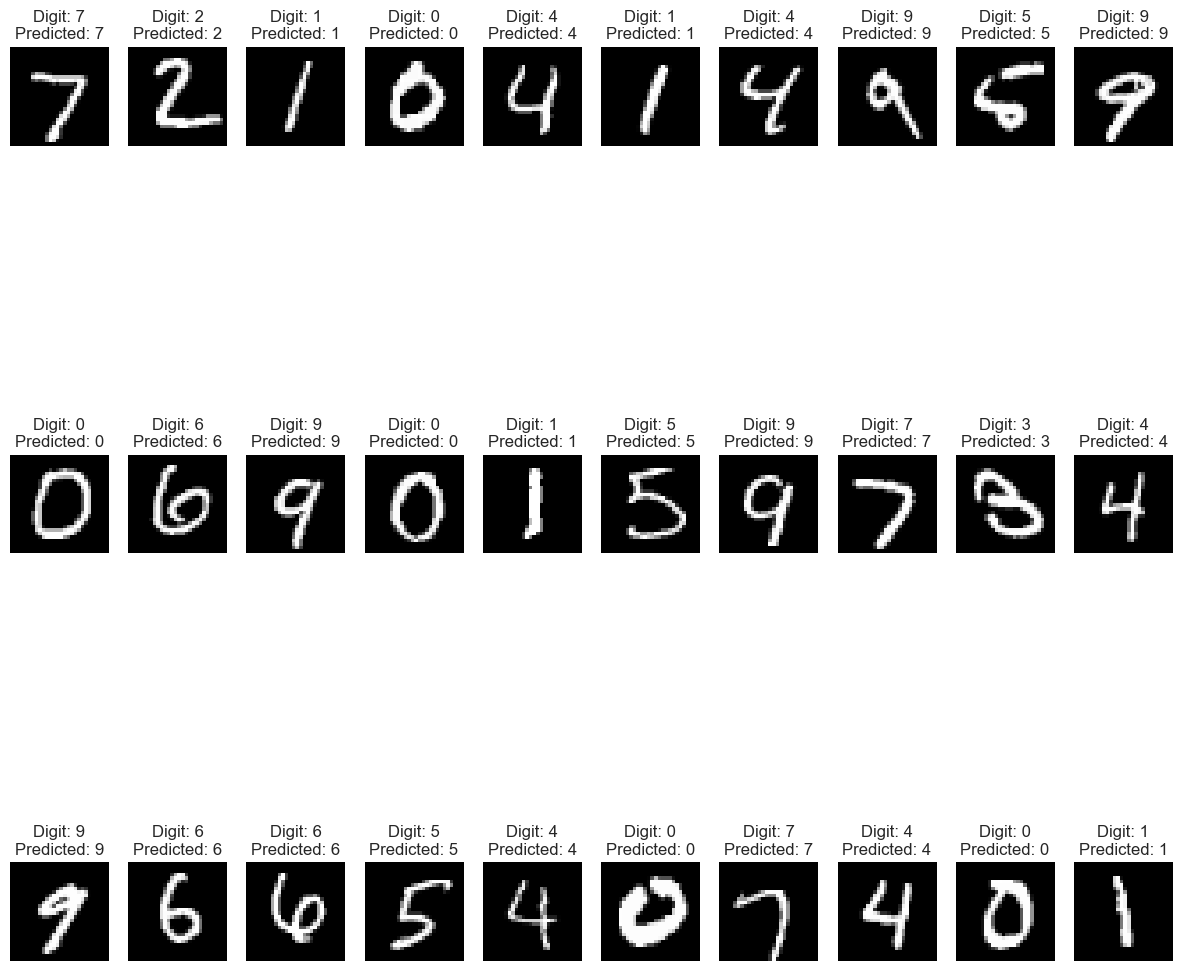

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming that img_rows and img_cols have been defined
# Reshape X_test to fit the input shape required by the CNN model
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# Get model predictions for the test set
predictions = model_CNN.predict(X_test)

# Display the first 30 images along with true and predicted labels
plt.figure(figsize=(15, 15))  # Set the figure size for display
for i in range(30):    
    ax = plt.subplot(3, 10, i + 1)  # Create a subplot grid of 3 rows by 10 columns
    plt.imshow(X_test[i, :, :, 0], cmap='gray')  # Show the image in grayscale
    # Display the true label and the predicted label for each image
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))
    plt.axis('off')  # Hide the axis for a cleaner look
plt.show()  # Render the figure


Finally, it is possible to observe how the system successfully predicts different numbers with various shades.

### Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [10]:
# TO LOAD FILES ON GOOGLE COLAB
#from google.colab import files
#upload = files.upload() #this will let you browse and choose the file to be uploaded

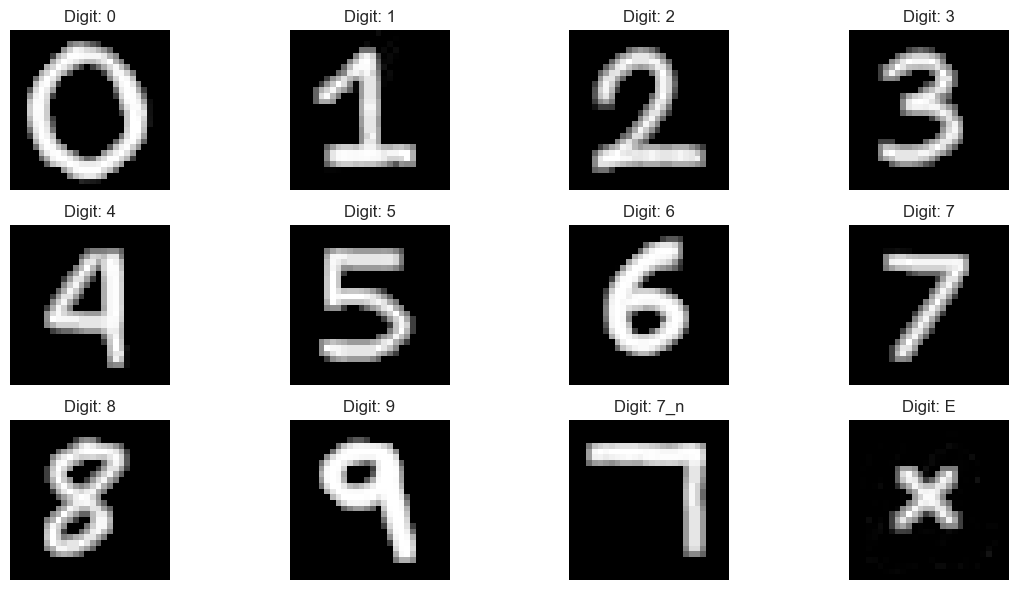

In [29]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Function to load and display images in a 3x4 grid
def load_and_show_images():
    # Create the figure with 3 rows and 4 columns for displaying images
    plt.figure(figsize=(12, 6))  # Set the size of the figure

    # List of image filenames to load
    digit_filenames = [f"./{digit}.png" for digit in range(10)] + ["./7_n.png", "./E.png"]
    titles = [f"Digit: {digit}" for digit in range(10)] + ["Digit: 7_n", "Digit: E"]

    # Load and display each image
    for idx, filename in enumerate(digit_filenames):
        # Open the image and convert it to grayscale
        digit_in = Image.open(filename).convert('L')
        
        # Get the dimensions of the image
        ydim, xdim = digit_in.size
        pix = digit_in.load()  # Load pixel data
        data = np.zeros((xdim, ydim))  # Create an empty array to hold image data
        
        # Iterate over each pixel in the image and store it in the 'data' array
        for j in range(ydim):
            for i in range(xdim):
                data[i, j] = pix[j, i]
        
        # Normalize the data to a range of 0 to 1
        data /= 255.0
        
        # Add the image to the grid of subplots
        plt.subplot(3, 4, idx + 1)  # 3 rows, 4 columns, position
        plt.imshow(data, cmap='gray')  # Display the image in grayscale
        plt.title(titles[idx])  # Set the title for the image
        plt.axis('off')  # Hide axis to focus on the image
    
    # Adjust the layout of the images for better spacing and display the grid
    plt.tight_layout()
    plt.show()

# Call the function to display and analyze the images
load_and_show_images()


I use the previously trained DNN to predict the digit:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


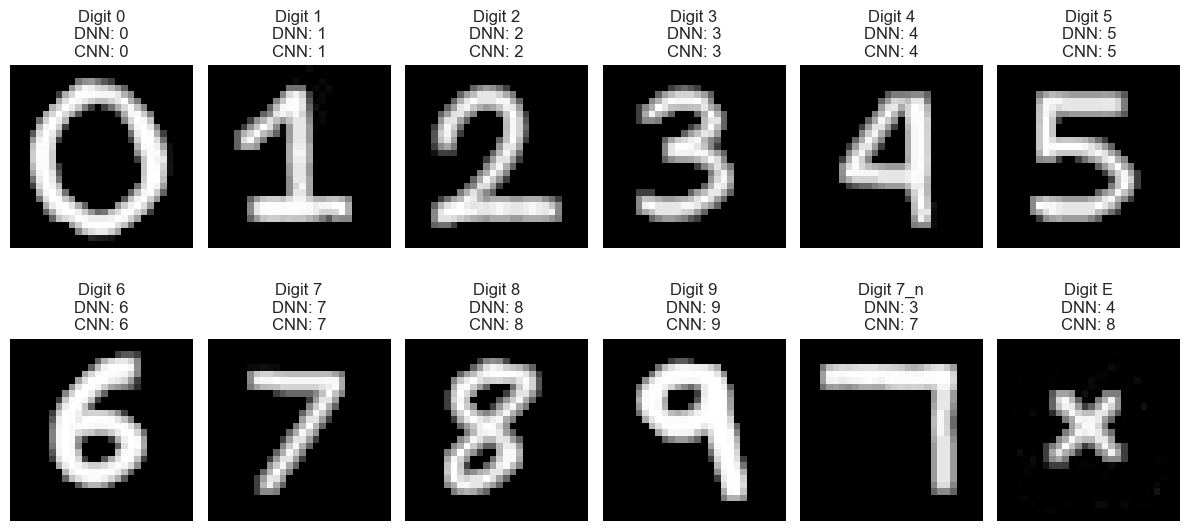

In [33]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Funzione per caricare un'immagine, effettuare la predizione con DNN e CNN, e visualizzare il risultato
def predict_images_dnn_cnn(model_DNN, model_CNN):
    # Crea la figura con 2 righe e 6 colonne
    plt.figure(figsize=(12, 6))  # Imposta la dimensione della figura

    # Elenco dei file di immagini da caricare
    digit_filenames = [f"./{digit}.png" for digit in range(10)] + ["./7_n.png", "./E.png"]
    titles = [f"Digit {digit}" for digit in range(10)] + ["Digit 7_n", "Digit X"]

    for idx, filename in enumerate(digit_filenames):
        # Carica e preprocessa l'immagine
        digit_in = Image.open(filename).convert('L')
        ydim, xdim = digit_in.size
        pix = digit_in.load()
        data = np.zeros((xdim, ydim))
        for j in range(ydim):
            for i in range(xdim):
                data[i, j] = pix[j, i]
        data /= 255.0
        
        # Prepara i dati per le predizioni
        data_dnn = data.reshape(1, xdim * ydim)  # Input per DNN (flattened)
        data_cnn = data.reshape(1, xdim, ydim, 1)  # Input per CNN (28x28x1)

        # Predizione con DNN
        pred_dnn = model_DNN.predict(data_dnn)
        predicted_digit_dnn = np.argmax(pred_dnn)

        # Predizione con CNN
        pred_cnn = model_CNN.predict(data_cnn)
        predicted_digit_cnn = np.argmax(pred_cnn)

        # Aggiungi l'immagine e le predizioni alla griglia di subplots
        plt.subplot(3, 4, idx + 1)  # 2 righe, 6 colonne, posizione
        plt.imshow(data, cmap='gray')
        plt.title(f"{titles[idx]}\nDNN: {predicted_digit_dnn}\nCNN: {predicted_digit_cnn}")
        plt.axis('off')

    # Mostra la griglia di immagini
    plt.tight_layout()
    plt.show()

# Esegui la funzione di predizione su tutte le immagini da 0 a 9 e le aggiuntive
predict_images_dnn_cnn(model_DNN, model_CNN)


## Discussion and Observation:

With these results, it is possible to observe how, using the selected parameters, the deep neural network (DNN) and convolutional neural network (CNN) successfully predict all digits from 0 to 9 when trained with images from the MNIST library. Furthermore, it is interesting to see how we attempted to challenge the networks by introducing a more schematic version of the digit "7" and an "x" shape. It’s notable that the CNN recognizes the new "7_n" and interprets the "x" as an "8," while the DNN does not exhibit this behavior. This result is expected, as the CNN focuses on learning and recognizing distinct features in the analyzed images. Thus, while the revised "7" is more identifiable, the CNN’s interpretation of the "x" as an "8" can be attributed to the "x" resembling the central structure of the "8."

Therefore, the graphical data from the simulations offer valuable insights, especially regarding the networks' responses to these "deceptive" inputs.


### <span style="color:green">Supplementary information 1: Use of `gimp` </span>

- from the Unix shell type: `gimp` and hit `Return`
- File -> new (chose: 28x28 pixels)
- rascale the image to 800%
- Use the **brush** with dimension 2px to draw your digit
- Color -> invert (to have black background)
- Export the image as a `.png` file

That's all!

### <span style="color:green">Supplementary information 2: Display trained filters in your CNN</span>

Print your NN layers:

In [13]:
layer_index=0
for layer in model_CNN.layers:
    print(layer_index, layer.name)
    layer_index+=1

0 conv2d
1 max_pooling2d
2 dropout_1
3 conv2d_1
4 max_pooling2d_1
5 dropout_2
6 flatten
7 dense_3
8 dropout_3
9 dense_4


Display your filters:

(5, 5, 1, 10)


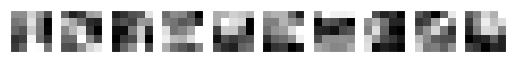

In [14]:
# layer_index should be the index of a convolutional layer
layer_index=0
# retrieve weights from the convolutional hidden layer
filters, biases = model_CNN.layers[layer_index].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
print(filters.shape)

# plot filters
n_filters, ix = filters.shape[3], 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # specify subplot and turn of axis
    ax = plt.subplot(1,n_filters, ix)
    ax.set_xticks([])
    ax.set_yticks([])
    # plot filter channel in grayscale
    plt.imshow(f[:, :, 0], cmap='gray')
    ix += 1
# show the figure
plt.show()

### <span style="color:green">Supplementary information 3: Monitor layer outputs in your CNN</span>

In [15]:
test_index = 0

from keras.models import Model
layer_outputs = [layer.output for layer in model_CNN.layers]
activation_model = Model(inputs=model_CNN.input, outputs=layer_outputs)
activations = activation_model.predict(X_test[test_index].reshape(1,28,28,1))
 
def display_activation(activations, col_size, row_size, layer_index): 
    activation = activations[layer_index]
    activation_index=0
    fig, ax = plt.subplots(row_size, col_size, figsize=(row_size*3,col_size*3))
    for row in range(0,row_size):
        for col in range(0,col_size):
            ax[row][col].imshow(activation[0, :, :, activation_index], cmap='gray')
            activation_index += 1

AttributeError: The layer sequential_1 has never been called and thus has no defined input.

In [ ]:
%matplotlib inline
plt.imshow(X_test[test_index][:,:,0], cmap='gray')
# def display_activation(activations, col_size, row_size, layer number)
display_activation(activations, 4, 2, 0)
# col_size x row_size must be <= Number of filters for the convolutional layer